In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 数据处理
data = pd.read_csv("kmeans.csv", header=None)
data = data.iloc[:, 0:].values
print(data)

[[1.0000e+00 1.0000e+00 7.7605e-01 ... 0.0000e+00 2.5000e-03 8.7177e-01]
 [1.0000e+00 1.0000e+00 5.6075e-01 ... 0.0000e+00 8.8000e-04 8.9986e-01]
 [1.0000e+00 1.0000e+00 8.9112e-01 ... 0.0000e+00 4.3600e-03 8.6149e-01]
 ...
 [3.0000e+00 1.5254e-01 1.5254e-01 ... 8.4750e-02 0.0000e+00 3.2210e-01]
 [3.0000e+00 2.3320e-01 5.5336e-01 ... 1.1860e-02 0.0000e+00 5.6293e-01]
 [3.0000e+00 2.9020e-01 5.4902e-01 ... 0.0000e+00 1.9610e-02 5.8459e-01]]


In [3]:
def kmeans(data, K, max_iterations=200):
    # 随机选择K个初始中心
    centers = data[np.random.choice(data.shape[0], K, replace=False)]    # choice函数选择索引
    
    for i in range(max_iterations):
        # 计算每个点到中心的距离，并分配到最近的簇
        distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2) # 运用广播机制，得到一个（data.shape[0], 3）的distance张量
        labels = np.argmin(distances, axis=1) # 得到一个 (data.shape[0], 1）的张量，存储了每一个数据点的类标签
        
        # 计算新的中心
        new_centers = np.array([data[labels == k].mean(axis=0) for k in range(K)])      # (3, 11)的聚类中心      labels == k是一个布尔数组
        
        # 检查中心是否收敛
        if np.all(centers == new_centers):
            break

        centers = new_centers
    
    return centers, labels

In [4]:
centers, labels = kmeans(data, 3)
with open("labels.txt", 'w') as file:
       for cluster in labels:
          file.write(f"{cluster}\n")
distances_squared = np.linalg.norm(data - centers[labels], axis=1) ** 2
inertia = np.sum(distances_squared)
print(f"距离平方和：{inertia}")
accuracy = ( np.max(np.bincount(labels[:60])) + np.max(np.bincount(labels[60:120])) + np.max(np.bincount(labels[120:180])) ) / 180
print(f"正确率：{accuracy}")


距离平方和：44.125229129079656
正确率：0.9611111111111111


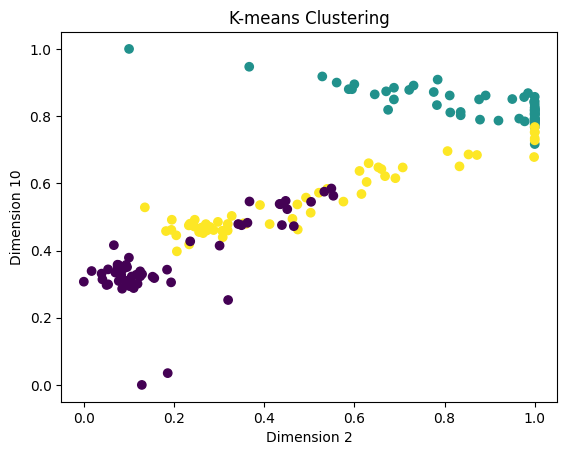

In [5]:
# 绘制散点图
plt.scatter(data[:, 2], data[:, 10], c=labels, cmap='viridis')
plt.xlabel('Dimension 2')
plt.ylabel('Dimension 10')
plt.title('K-means Clustering')
plt.show()